<a href="https://colab.research.google.com/github/suumino/Bioinformatics/blob/main/%EC%9D%B4%EB%A1%A0/02_DBGAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**De brujin graph**

Genome assembly -> graph -> k-mer로 쪼갬 -> Hamiltion

Eulerian cycle -> De brujin graph(k-1-mer를 mode로 하는 graph)생성

#**왜 graph를 genome assenbly에 사용하는가**

Graph walk를 하는것을 시각화하는것은 graph로부터 통찰력을 끌어내는 데 이용하는 여러 종류의 Algorithm을 이해하는 데 도움을 준다

특히, Genome assenbly의 경우 Graph를 이용해 **Overlap되는 read를 추적함으로써 후보 assembly**를 찾을 수 있다


#**Hamiltonian cycle(기존의 K-mer를 이용한 assembly)**
1. 일련의 reads로부터 k-mer마다 node 생성
2. k-mer가 주어지면 맨 첫번째 k-mer를 제외한 나머지 nt에서 prefix을 정의하고, 맨 마지막 k-mer를 제외한 나머지 nt에서 suffi을 정의한다. 그리고 전 k-mer의 suffix와 후 k-mer prefix가 일치하면 diredted edge를 이용해 하나의 k-mer를 다른 k-mer와 연결한다. (각 양쪽의 하나의 n.t를 제외하고 두 k-mer가 완전히 겹치는 경우)
3. candidate genome을 나타내는 Hamiltonian cycle을 찾는다. (Hamiltonian은 detected된 각 k-mer를 한번씩만 방문하기 때문에 path가 최소길이를 갖는다)

**이 방법은 쉽지않음**

* 수많은 노드를 갖는 large graph에서 Hamiltonian cycle을 찾는 효율적인 알고리즘이 없다
* Hamiltonian cycle은 Sanger sequencing, microbial genome sequencing, human genome sequencing에 적합했지만 NGS는 계산적인 부담이 너무 커서 사용할 수 없다
* genome sequencing이 부딪힌 최근 computer science의 한계가 존재한다
* Hamiltonian cycle을 찾는 computational problems 는 NP-complete라 불리는 문제임

**Eulerian cycle**
* 그래프의 모든 노드를 한번만 방문하는 Hamiltonian cycle은 어렵
* 그래프의 모든 모서리를 정확히 한 번 방문하는 주기를 찾는것이 쉽다. 따라서 각 k-mer를 노드에 할당하는 대신 read내에 있는 k-mer를 edge에 할당했다(k-mer 대신 k-1-mer를 node로 사용하는 이유)
* De bruijn graph 생성 가능

1. 일련의 reads로부터 k-mer를 만들고, 각 k-1-mer마다 node를 생성한다(k-mer를 edge에 할당)
2. k-mer의 prefix와 suffix를 edge를 이용해 연결





#**Practical stategies for applying de bruijn graph**

* de bruijn graph를 experimental data에 적용하는 것은 간단하지 않다
* sequencing 과정에서 발생하는 error나 quirks에 의한 practical challenge 해결
* repeat rich genome에 의해 만들어지는 complexities 해결

**fragment assembly를 위한 de bruijn method 는 4가지의 hidden assumption에 의존**

1. 우리가 genome에 존재하는 모든 k-mer를 만들 수 있음(작은 k-mer의 단위)
2. 모든 k-mer가 error-free(error correcting 기술)
3. 각 k-mer가 genome에서 최대 한번만 나타남(k-mer multiplicity)
4. single circular chromosome을 구성하는 genome(linear에 맞게 graph 사용)



#**de bruijn method 사용 조건**
**1. Generating (nearly) all k-mers present in the genome**

* 작은 k-mer의 단위로 쪼개 de bruijn graph에 적용시킬 수 있게 만듦(L-1만큼 중첩되는 k-mers가 있어야만 de bruijn graph에 적용 가능함)
  - illumina를 통해 얻은 100-mer reads들은 genome의 모든 가능한 100-mers의 아주 작은 일부분만을 capture
  - 모든 k-mer들이 L-1만큼 중첩되어야한다는 de bruijn의 key assumption을 위반함
  - 일루미나를 통해 만든 100nt의 read들이 아무리 많은 coverage에서 돌려도 모든 100-mers들이 나오지 않음

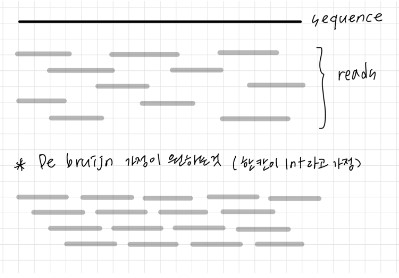
* 이 read를 더 짧은 k-mers로 만들면 genome에 존재하는 거의 모든 k-mer를 만들 수 있음




**2. Handling errors in reads**
* sequencing에서의 error 해결
* bulge의 원인
  1. error가 생기면 de bruijn graph에 bulge(툭 튀어나온 부분)가 생성되어 assembly를 복잡하게 만듦
  2. inexact repeats를 가진 genome에서 두 repeat copies로부터 만들어진 read도 bulge를 생성함(오류가 아닌 서로 비슷한 부분이 반복되는 두 지점)
* bulge를 해결하기 위해 assembly 전에 error-correcting 단계 존재
  - NGS assembler: EULER-SR20, Velvet21, ALLPATHS22, ABySS23, SOAPdenovo24
  - NGS data를 이용해 만들어진 Large genome을 assembling 하기 위해 way를 pave함

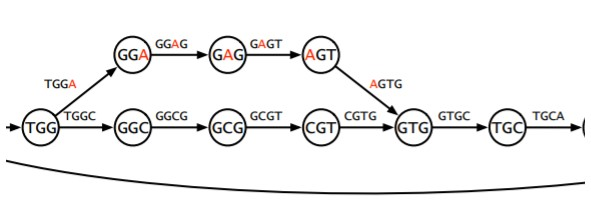

**3. Handling DNA repeats**
* k-mer multiplicity: all k-mers가 몇번씩 존재하느냐
  - ex) ATGCATGC -> 이를 de bruijn graph에 적용하면 -> ATGC가 나옴
  - k-mer들은 두번씩만 발생하기 때문에 나오는 문제
  - **k-mer multiplicity로 해결 가능**
    + ex) TGC, GCG, CGT, GTG -> multiplicity 2/ATG, TGG, GGC, GCA, CAA, AAT ->multiplicity 1인 경우
    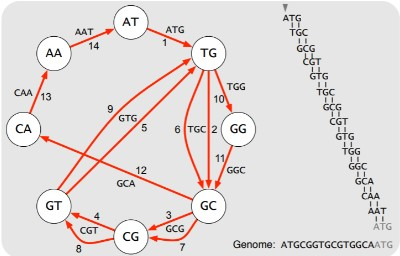

    + 이러한 graph생성
    + indegree와 outdegree의 개수 = genome에서 나타나는 mode(k-1-mer)의 개수


**실전 NGS기술로 k-mer의 multiplicities에 대한 정보 얻기 어렵다**
* Computer scientists들이 이러한 정보들을 알수 없어도 genome을 reconstruct하는 방법을 찾음
* 몇몇 tech는 Paired reads(Forward, Reverse) 포함

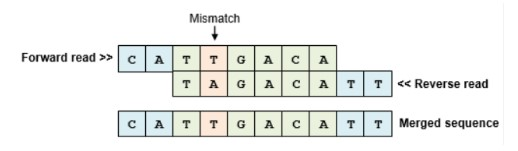

* read는 이런식으로 쌍을 이룸
* DNA의 긴 fragment의 양쪽 끝에서 sequencing 하고, read map은 repeat의 시작부분에서 시작, 다른 read map은 repeat의 종료 부분에서 시작하여 각 read pair를 이용해 correct traversal을 결정


**4. Handling multiple and linear chromosome**
* linear chromosome이라면 시작점과 끝나는 점이 같을 필요가 없는 Eulerian path를 사용
* multiple linear chromosome이 존재할 때는 각 chromosome에 대해 하나씩 path를 만든다
* Euler's work는 complecities를 다룬다

**Handling unsequenced regions: 아예 sequencing되지 않는 부분: Scaffolding**
* sequencing되지 않는 부분들이나 sequencing error들이 chromosome을 contig(sequenced contiguous region)와 gap(unsequenced region)으로 break함
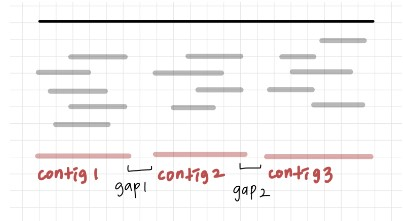

* 각 contig당 1개의 path를 형성
* coverage가 높은 상태에서는 k값을 늘리면 bulge의 수를 줄일 수 있고, 더 긴 contig를 만들 수 있다.
* coverage가 낮은 상태에서는 k값을 늘리면 contigs를 break해버릴 수 있다.
* 연속적인 contig가 k보다 적은 수만큼 겹친다거나 그들 사이에 gap이 존재할 수 있다. 대략적인 gaps의 사이즈를 결정한다

**Scaffolding**
* paired end의 정보를 통해서 순서를 알게 된 contigs간의 모임

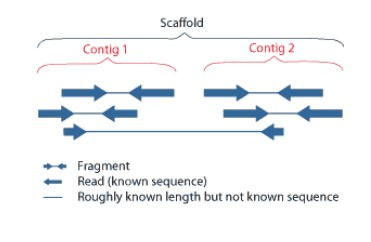